In [49]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors

In [50]:
dataset = pd.read_csv("train.csv")
dataset.columns    

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
le = preprocessing.LabelEncoder()
le.fit(dataset["Sex"])
dataset["Sex"] = le.transform(dataset["Sex"])
dataset["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [52]:
dataset["Embarked"] = np.where(dataset["Embarked"].isnull(),dataset["Embarked"].mode(),dataset["Embarked"])
dataset["Age"] = np.where(dataset["Age"].isnull(),dataset["Age"].mean(),dataset["Age"])
le.fit(dataset["Embarked"])
dataset["Embarked"] = le.transform(dataset["Embarked"])

In [53]:
dataset1 = dataset.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
dataset1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [54]:
scores = {}

def get_kscore(i):
    y=dataset1["Pclass"]
    X= dataset1.drop(["Pclass"],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    k_score = knn.fit(X_train,y_train).score(X_test,y_test)
    return k_score

for x in range(1,269):   
    scores[x] = get_kscore(x)

    
    
    
#print(scores)
    
       

In [55]:
key_max = max(scores, key=scores.get) 
print("Key value {} give maximum accuracy of {}".format(key_max,scores[Keymax]))

Key value 1 give maximum accuracy of 0.8544776119402985


# Key value 1 give maximum accuracy of 0.8544776119402985

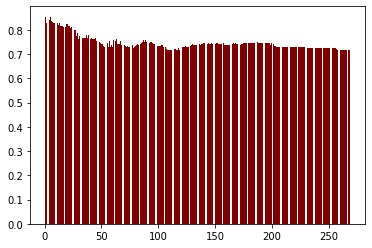

In [56]:
import matplotlib.pyplot as plt 
plt.bar(scores.keys(), scores.values(), color ='maroon')
plt.show()
#print(scores.keys())